# Initation
Reading all result files, replace the results_dir with the relevant path.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Ersätt denna path.
results_dir = "/Volumes/GoogleDrive/.shortcut-targets-by-id/10oYqI9u7nCLK0q7xF2CvGGIQVokusjaI/Exjobb/11. Results"

# Read ids and results and pick out which items are from combined policy and which are from "regular" one.
item_ids = pd.read_csv(f"{results_dir}/csv_files/item_ids.csv")["Item id"].to_numpy()
results_df = pd.read_csv(f"{results_dir}/csv_files/results.csv")
ids_combined = results_df.loc[results_df["MMI inventory policy"] == "PDCZA_Johannesburg_Combined_IP","Item id"].to_numpy()
ids_regular = results_df.loc[results_df["MMI inventory policy"] == "PDCZA_Johannesburg_IP","Item id"].to_numpy()
results_df.set_index("Item id", drop = False, inplace = True)

df_dict = {}

for id in item_ids:
    df = pd.read_csv(f"{results_dir}/csv_files/{id}_results.csv")
    df.set_index("Installation name", inplace = True)
    df_dict[id] = df
    
assert len(ids_combined) == 29
assert len(ids_regular) == 9


## Reorder points at warehouse per item graph

In [53]:
import matplotlib.pyplot as plt
import matplotlib.style
all_dealers = ["Bartlett","Bloemfontein","Capetown","Durban","George",
"Kimberley","Lichtenburg","Middelburg","Nelspruit","Port Elizabeth",
"Richards Bay","Rustenburg","Steelpoort","Wolmaransstad"]
color_dict = {"BM_model": '#2D3B60', "SE_model": '#7488BD', "BM_simulation": '#577C24', "SE_simulation": '#CBE5A6', "target": 'black'}
linestyle_dict = {"BM_model": 'solid', "SE_model": 'dashed', "BM_simulation": 'dotted', "SE_simulation": 'dashdot', "target": 'solid'}
marker_dict = {"BM_model": 'o', "SE_model": '^', "BM_simulation": 's', "SE_simulation": 'D', "target": ','}


# Reorder points
- Warehouse reorder points
- Reorder points at specific dealer
- Mean reorder point at dealers

## Warehouse reorder points

R warehouse combined policy per item.


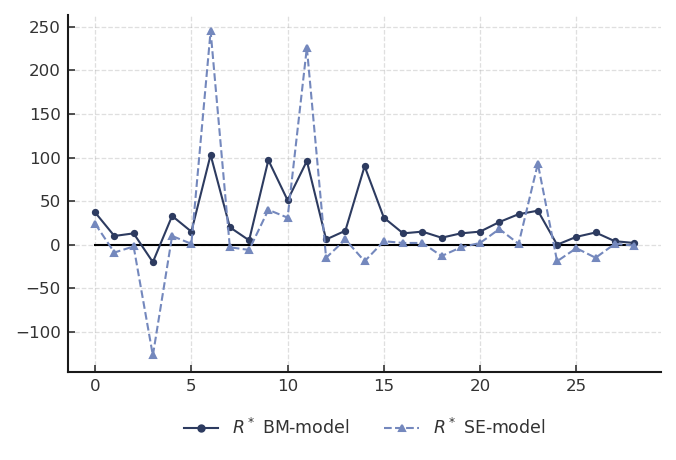

In [92]:
# Warehouse reorder points combined items
df = pd.DataFrame({"Item id": ids_combined,"R_wh_BM": np.nan,"R_wh_SE": np.nan})
df.set_index("Item id", inplace = True)
for id in ids_combined:
    df.loc[id,"R_wh_BM"] = df_dict[id].loc["Johannesburg","R, BM model"]
    df.loc[id,"R_wh_SE"] = df_dict[id].loc["Johannesburg","R, SE model"]

df.reset_index(inplace = True)

x = df.index.values
x_zeros = x
y_R_BM = df["R_wh_BM"].values
y_R_SE = df["R_wh_SE"].values

y_R_BM2 = df["R_wh_BM"].values +40
y_R_SE2 = df["R_wh_SE"].values +40

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()
ax.plot(x_zeros,np.zeros_like(x_zeros), color = 'black',linestyle = '-')
#ax.plot(x,50*np.ones_like(x),label = "target", color = color_dict["target"])
ax.plot(x, y_R_BM, label = "$R^*$ BM-model", color = color_dict["BM_model"], marker = marker_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
ax.plot(x, y_R_SE, label = "$R^*$ SE-model", color = color_dict["SE_model"], marker = marker_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
#ax.plot(x, y_R_BM2, label = "$R^*$ BM-sim", color = color_dict["BM_simulation"], marker = marker_dict["BM_simulation"], linestyle = linestyle_dict["BM_simulation"])
#ax.plot(x, y_R_SE2, label = "$R^*$ SE-sim", color = color_dict["SE_simulation"], marker = marker_dict["SE_simulation"], linestyle = linestyle_dict["SE_simulation"])

ax.legend(bbox_to_anchor=(0.5,-0.23),ncol = 2)

print("R warehouse combined policy per item.")
plt.savefig("test.png")
plt.show()

R warehouse, regular policy, per item.


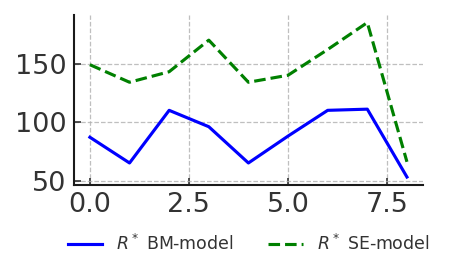

In [7]:
df = pd.DataFrame({"Item id": ids_regular,"R_wh_BM": np.nan,"R_wh_SE": np.nan})
df.set_index("Item id", inplace = True)
for id in ids_regular:
    df.loc[id,"R_wh_BM"] = df_dict[id].loc["Johannesburg","R, BM model"]
    df.loc[id,"R_wh_SE"] = df_dict[id].loc["Johannesburg","R, SE model"]

df.reset_index(inplace = True)

x = df.index.values
y_R_BM = df["R_wh_BM"].values
y_R_SE = df["R_wh_SE"].values

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()
ax.plot(x, y_R_BM, label = "$R^*$ BM-model", color = color_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
ax.plot(x, y_R_SE, label = "$R^*$ SE-model", color = color_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
ax.legend(bbox_to_anchor=(0.5,-0.5),ncol = 2)

print("R warehouse, regular policy, per item.")
plt.show()

## Reorder point at specific dealer

### Combined policy

R Bartlett combined policy per item.
Dealer contains all items.


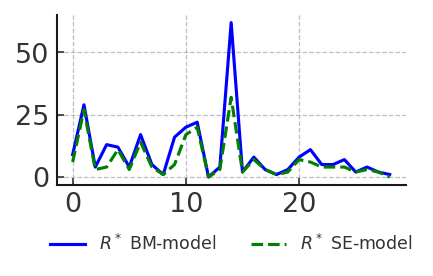

R Bloemfontein combined policy per item.
Dealer contains all items.


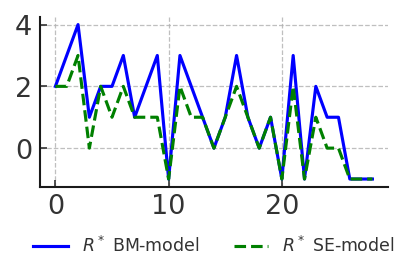

R Capetown combined policy per item.
Dealer contains all items.


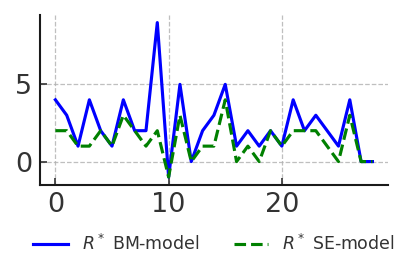

R Durban combined policy per item.
Items: {'1522293'} are not available at Durban.


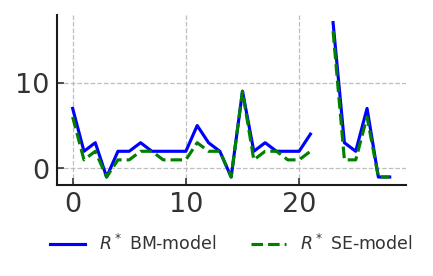

R George combined policy per item.
Items: {'11882353', '13947630', '13947628', '14508017', '1522293', '14524171', '11709051', '13947627', '14511215'} are not available at George.


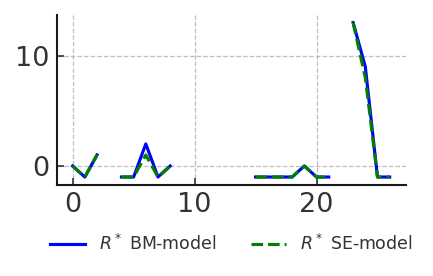

R Kimberley combined policy per item.
Items: {'13947630', '1522293', '13947627', '14596399', '11708551'} are not available at Kimberley.


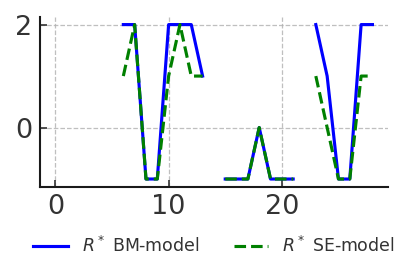

R Lichtenburg combined policy per item.
Items: {'11882353', '14524170', '14519261', '1522293', '1030-61460', '11709050', '11709051', '1141-00010', '11709133', '11709302', '13947628', '14509379', '11715254', '14881276', '14511215', '14596399', '11883618', '11110283', '13947630', '11110022', '11988555', '11110668', '11700375', '11708551', '14524171', '14508017', '13947627', '14503269', '11716790'} are not available at Lichtenburg.


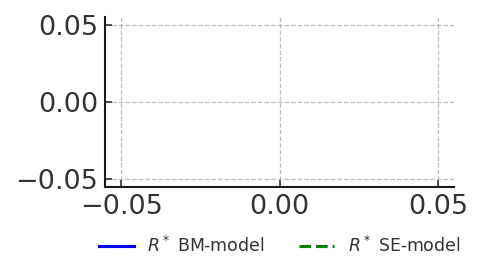

R Middelburg combined policy per item.
Items: {'11709051', '11716790', '14519261'} are not available at Middelburg.


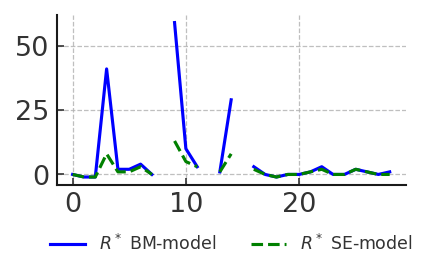

R Nelspruit combined policy per item.
Items: {'11708551'} are not available at Nelspruit.


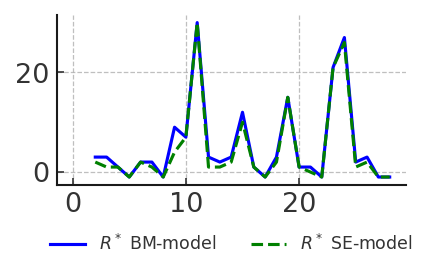

R Port Elizabeth combined policy per item.
Items: {'13947630', '14524171', '11988555', '1522293', '14508017', '11709051', '13947627'} are not available at Port Elizabeth.


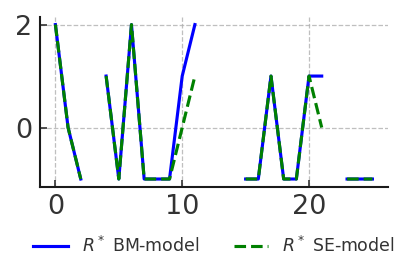

R Richards Bay combined policy per item.
Items: {'11709051', '14524171', '14508017'} are not available at Richards Bay.


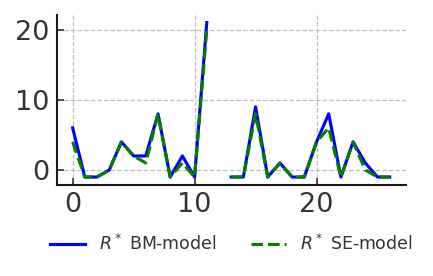

R Rustenburg combined policy per item.
Items: {'14524171', '14508017', '11716790', '11709133', '11709302', '11708551'} are not available at Rustenburg.


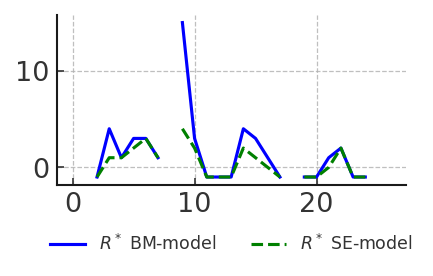

R Steelpoort combined policy per item.
Items: {'11882353', '14524171', '14519261', '11988555', '14508017', '11716790', '11709133', '11708551'} are not available at Steelpoort.


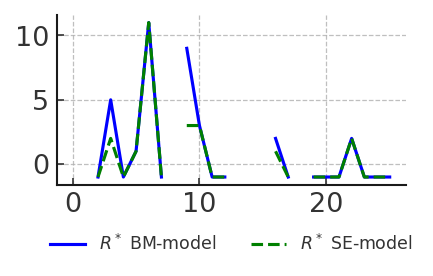

R Wolmaransstad combined policy per item.
Items: {'11882353', '11110283', '11716790', '14519261'} are not available at Wolmaransstad.


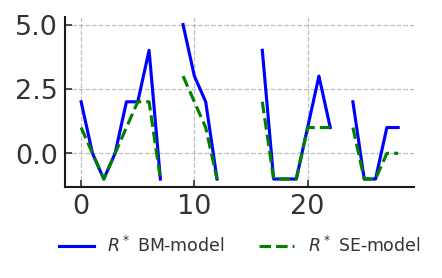

In [8]:
# R per item at a specific dealers for combined items.
# For one dealer
dealer_list = all_dealers
for dealer in dealer_list:
    df = pd.DataFrame({"Item id": ids_combined,"R_wh_BM": np.nan,"R_wh_SE": np.nan})
    df.set_index("Item id", inplace = True)
    
    items_not_in_dealer = set()
    for id in ids_combined:
        try:
            df.loc[id,"R_wh_BM"] = df_dict[id].loc[dealer,"R, BM model"]
            df.loc[id,"R_wh_SE"] = df_dict[id].loc[dealer,"R, SE model"]
        except KeyError:
            items_not_in_dealer.add(id)

    df.reset_index(inplace = True)

    x = df.index.values
    y_R_BM = df["R_wh_BM"].values
    y_R_SE = df["R_wh_SE"].values

    plt.style.use('our_style.mplstyle')
    fig, ax = plt.subplots()
    ax.plot(x, y_R_BM, label = "$R^*$ BM-model", color = color_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
    ax.plot(x, y_R_SE, label = "$R^*$ SE-model", color = color_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
    ax.legend(bbox_to_anchor=(0.5,-0.5),ncol = 2)

    print(f"R {dealer} combined policy per item.")
    if len(items_not_in_dealer) == 0:
        print("Dealer contains all items.")
    else:
        print(f"Items: {items_not_in_dealer} are not available at {dealer}.")
    plt.show()

### Regular policy

R Bartlett regular policy per item.
Dealer contains all items.


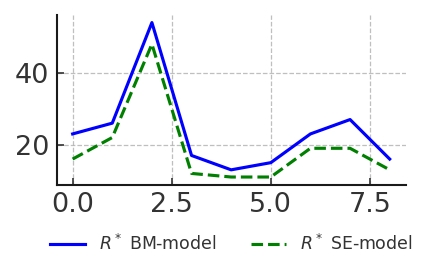

R Bloemfontein regular policy per item.
Dealer contains all items.


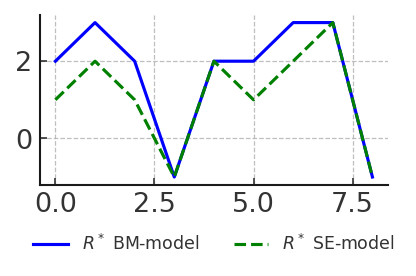

R Capetown regular policy per item.
Dealer contains all items.


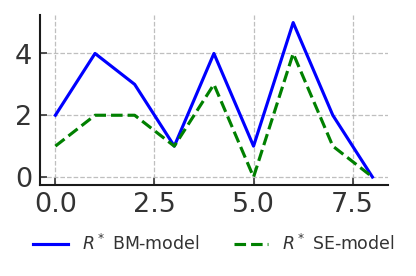

R Durban regular policy per item.
Dealer contains all items.


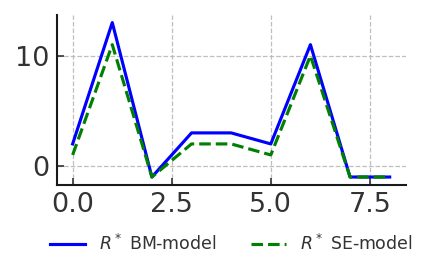

R George regular policy per item.
Items: {'14690316'} are not available at George.


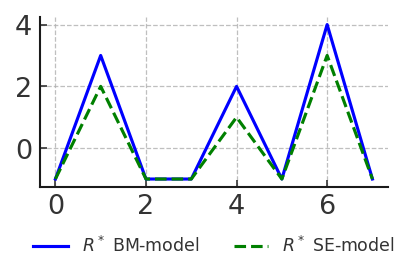

R Kimberley regular policy per item.
Dealer contains all items.


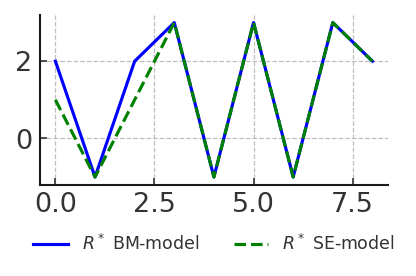

R Lichtenburg regular policy per item.
Items: {'14711981', '14690316', '14622355', '11110176', '11110023', '14750657', '14689735', '14688861', '11110175'} are not available at Lichtenburg.


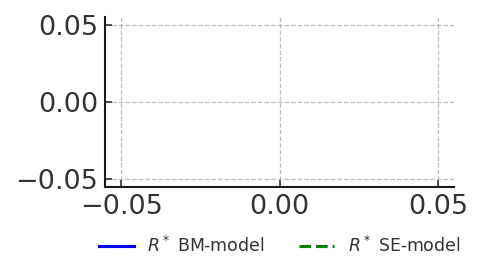

R Middelburg regular policy per item.
Dealer contains all items.


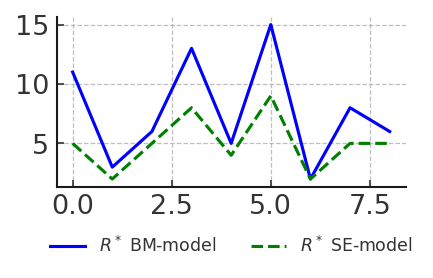

R Nelspruit regular policy per item.
Dealer contains all items.


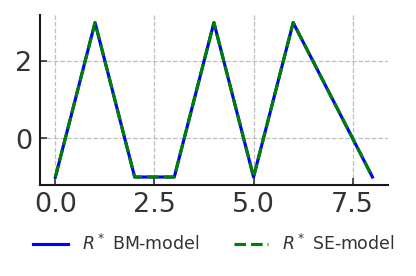

R Port Elizabeth regular policy per item.
Items: {'14750657'} are not available at Port Elizabeth.


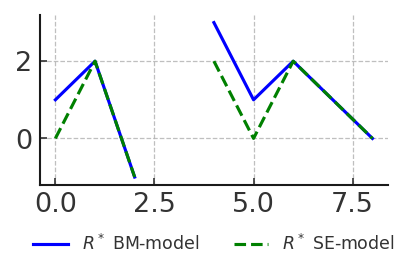

R Richards Bay regular policy per item.
Items: {'14690316'} are not available at Richards Bay.


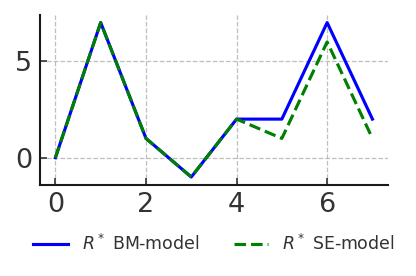

R Rustenburg regular policy per item.
Dealer contains all items.


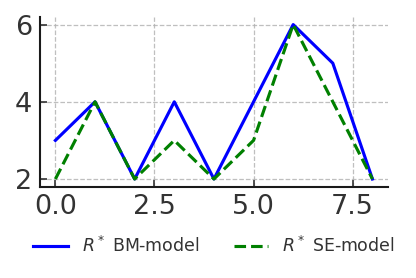

R Steelpoort regular policy per item.
Dealer contains all items.


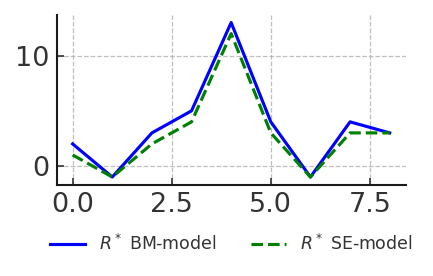

R Wolmaransstad regular policy per item.
Dealer contains all items.


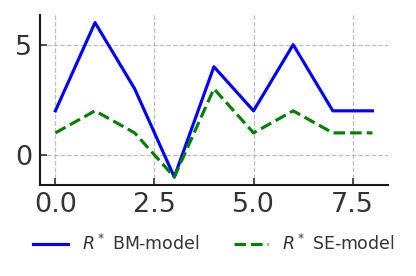

In [9]:
# R per item at a specific dealers for regular items.
# For one dealer
dealer_list = all_dealers
for dealer in dealer_list:
    df = pd.DataFrame({"Item id": ids_regular,"R_wh_BM": np.nan,"R_wh_SE": np.nan})
    df.set_index("Item id", inplace = True)
    
    items_not_in_dealer = set()
    for id in ids_regular:
        try:
            df.loc[id,"R_wh_BM"] = df_dict[id].loc[dealer,"R, BM model"]
            df.loc[id,"R_wh_SE"] = df_dict[id].loc[dealer,"R, SE model"]
        except KeyError:
            items_not_in_dealer.add(id)

    df.reset_index(inplace = True)

    x = df.index.values
    y_R_BM = df["R_wh_BM"].values
    y_R_SE = df["R_wh_SE"].values

    plt.style.use('our_style.mplstyle')
    fig, ax = plt.subplots()
    ax.plot(x, y_R_BM, label = "$R^*$ BM-model", color = color_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
    ax.plot(x, y_R_SE, label = "$R^*$ SE-model", color = color_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
    ax.legend(bbox_to_anchor=(0.5,-0.5),ncol = 2)

    print(f"R {dealer} regular policy per item.")
    if len(items_not_in_dealer) == 0:
        print("Dealer contains all items.")
    else:
        print(f"Items: {items_not_in_dealer} are not available at {dealer}.")
    plt.show()

## Mean reorder point at dealers

### Combined policy


Dealer R mean combined policy per item.


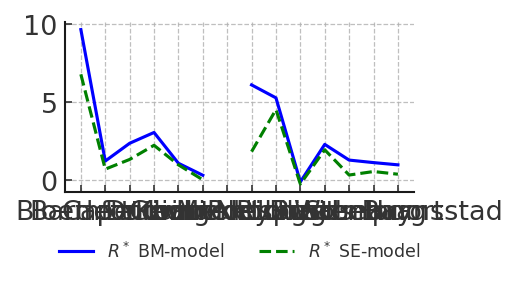

In [10]:
# Mean R per dealer for combined policy.
dealer_list = all_dealers

df = pd.DataFrame({"Dealer": dealer_list,"R_mean_BM": np.nan,"R_mean_SE": np.nan})
df.set_index("Dealer", inplace = True)

for dealer in dealer_list:
    R_BM_sum = 0
    R_SE_sum = 0
    R_count = 0
    for id in ids_combined:
        try:
            R_BM_sum += int(df_dict[id].loc[dealer,"R, BM model"])
            R_SE_sum += int(df_dict[id].loc[dealer,"R, SE model"])
            R_count += 1
        except KeyError:
            pass
            
    if R_count > 0:
        df.loc[dealer,"R_mean_BM"] = R_BM_sum/R_count
        df.loc[dealer,"R_mean_SE"] = R_SE_sum/R_count
    else:
        df.loc[dealer,"R_mean_BM"] = np.nan
        df.loc[dealer,"R_mean_SE"] = np.nan

x = df.index.values
y_R_BM = df["R_mean_BM"].values
y_R_SE = df["R_mean_SE"].values

plt.style.use('our_style.mplstyle')
fig, ax = plt.subplots()
ax.plot(x, y_R_BM, label = "$R^*$ BM-model", color = color_dict["BM_model"], linestyle = linestyle_dict["BM_model"])
ax.plot(x, y_R_SE, label = "$R^*$ SE-model", color = color_dict["SE_model"], linestyle = linestyle_dict["SE_model"])
ax.legend(bbox_to_anchor=(0.5,-0.5),ncol = 2)

print(f"Dealer R mean combined policy per item.")
plt.show()